# Bayesian Logistic Regression Modules

This notebook tests the modules that perform logistic regression.

In [1]:
### Libraries

import datetime as dt
import matplotlib, matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import pymc

# Library settings.
% matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
### Custom Modules

import bayes_lr
import game_predictions

In [3]:
### Reloading Examples

bayes_lr = reload(bayes_lr)
game_predictions = reload(game_predictions)

In [4]:
### Settings

# Games path.
games_path = '../../../data/games_2015_tournament.csv'

# Pre-tournament statistics path.
stats_path = '../../../data/kenpom_summaries/summary15_pt.csv'

# Tournament bracket path.
bracket_path = '../../../data/tournament_brackets/2015_64.csv'
final_four_bracket_path = '../../../data/tournament_brackets/2015_4.csv'

## Data

In [5]:
# Read games.
games = pd.read_csv(games_path)
# Trim to single group.
games = games[games.game_group == 1].reset_index(drop=True)
# 2014 games.
# games_2014 = games[games.year == 2014].reset_index(drop=True)

In [6]:
# Read stats.
pre_tournament_stats = pd.read_csv(stats_path)

In [7]:
# Read brackets.
bracket = pd.read_csv(bracket_path, header=None).values
final_four_bracket = pd.read_csv(final_four_bracket_path, header=None).values

## Model

In [8]:
# Features.
features = ['location_Home','diff_Tempo','diff_OE','diff_DE','diff_Pythag']
model_mcmc = bayes_lr.model_games(data=games,features=features)

In [9]:
model_mcmc.sample(10000,2000)

 [-----------------100%-----------------] 10000 of 10000 complete in 18.5 sec

## Predict

In [10]:
y_hat_raw, y_hat, y_hat_accuracy = game_predictions.predict_games(games, features, model_mcmc=model_mcmc, method='pp')

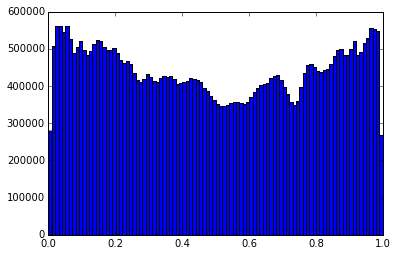

In [11]:
plt.hist(y_hat_raw.ravel(), bins=100);

## Simulate

In [12]:
# Some code to get random coefficients for testing.
coefs_all = bayes_lr.feature_coefficients(model_mcmc, features)
# print coefs_all.shape
c     = coefs_all[4000]
coefs = coefs_all[np.random.choice(len(coefs_all), size=10)]
# print coefs

In [13]:
# Output time information, simulate tournament.
print 'Start:',dt.datetime.now()
final_four_outcomes = game_predictions.simulate_tournament(final_four_bracket, pre_tournament_stats, features, model_mcmc=model_mcmc)
print 'End:  ',dt.datetime.now()

Start: 2015-05-02 12:36:48.250627
End:   2015-05-02 12:40:50.509868


In [14]:
final_four_outcomes

,wins_round_1,wins_round_2
Duke,7455,3728
Kentucky,3995,2130
Michigan St.,545,2
Wisconsin,4005,2140


In [15]:
# Output time information, simulate tournament.
print 'Start:',dt.datetime.now()
tournament_outcomes = game_predictions.simulate_tournament(bracket, pre_tournament_stats, features, model_mcmc=model_mcmc)
print 'End:  ',dt.datetime.now()

Start: 2015-05-02 12:40:50.528644
End:   2015-05-02 12:54:56.767343


In [16]:
tournament_outcomes

,wins_round_1,wins_round_2,wins_round_3,wins_round_4,wins_round_5,wins_round_6
Albany,0,0,0,0,0,0
Arizona,8000,7933,7042,3524,1748,903
Arkansas,8000,4043,0,0,0,0
Baylor,8000,5993,919,51,15,5
Belmont,0,0,0,0,0,0
Buffalo,3961,1945,0,0,0,0
Butler,4019,480,221,0,0,0
Cincinnati,4027,0,0,0,0,0
Coastal Carolina,0,0,0,0,0,0
Davidson,4012,0,0,0,0,0
